In [1]:
import pyspedas
import pytplot 
from pytplot.tplot import tplot   

In [2]:
from pyspedas.erg import mgf
download_trange = ['2017-03-29', '2017-03-30']
mgf(trange=download_trange, datatype='8sec')

30-May-23 18:39:24: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
30-May-23 18:39:26: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170329_v03.04.cdf
30-May-23 18:39:26: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

30-May-23 18:39:26: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_mgf_l2_epoch_8sec',
 'erg_mgf_l2_mag_8sec_dsi',
 'erg_mgf_l2_mag_8sec_gse',
 'erg_mgf_l2_mag_8sec_gsm',
 'erg_mgf_l2_mag_8sec_sm',
 'erg_mgf_l2_magt_8sec',
 'erg_mgf_l2_rmsd_8sec_dsi',
 'erg_mgf_l2_rmsd_8sec_gse',
 'erg_mgf_l2_rmsd_8sec_gsm',
 'erg_mgf_l2_rmsd_8sec_sm',
 'erg_mgf_l2_rmsd_8sec',
 'erg_mgf_l2_n_rmsd_8sec',
 'erg_mgf_l2_dyn_rng_8sec',
 'erg_mgf_l2_quality_8sec',
 'erg_mgf_l2_quality_8sec_gc',
 'erg_mgf_l2_igrf_8sec_dsi',
 'erg_mgf_l2_igrf_8sec_gse',
 'erg_mgf_l2_igrf_8sec_gsm',
 'erg_mgf_l2_igrf_8sec_sm']

In [3]:
from pyspedas.erg import mgf
mgf(trange=['2017-03-29 00:00:00', '2017-03-29 01:00:00'], datatype='64hz', coord='sgi')

30-May-23 18:39:26: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/64hz/2017/03/
30-May-23 18:39:29: File is current: erg_data/satellite/erg/mgf/l2/64hz/2017/03/erg_mgf_l2_64hz_sgi_2017032900_v03.04.cdf
30-May-23 18:39:29: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

30-May-23 18:39:29: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 64 Hz resolution magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_mgf_l2_epoch_64hz',
 'erg_mgf_l2_date_time_64hz',
 'erg_mgf_l2_mag_64hz_sgi',
 'erg_mgf_l2_dyn_rng_64hz',
 'erg_mgf_l2_quality_64hz',
 'erg_mgf_l2_quality_64hz_gc',
 'erg_mgf_l2_spin_phase_64hz',
 'erg_mgf_l2_ti_64hz']

In [6]:
mag = pytplot.get_data('erg_mgf_l2_magt_8sec')

1, load data

In [95]:
import numpy as np
import math

# Calculate fce
fce = mag[1] * 1.0 / (10 ** 9) * 1.6 * (10 ** -19) / (9.1093 * (10 ** -31)) / 2. / math.pi / 1000.  # in kHz

# Calculate fci
fci = mag[1] * 1.0 / (10 ** 9) * 1.6 * (10 ** -19) / (1.6726 * (10 ** -27)) / 2. / math.pi / 1000.  # in kHz

# Calculate flh
flh = np.sqrt(fce * fci)

# Store data
pytplot.store_data('fce', data={'x': mag[0], 'y': fce})
pytplot.store_data('fce2', data={'x': mag[0], 'y': fce * 0.5})
pytplot.store_data('flh', data={'x': mag[0], 'y': flh})

pytplot.options('fce', opt_dict={'ytitle': 'fce [kHz]', 'Color': 'red', 'thick': 1})
pytplot.options('fce2', opt_dict={'ytitle': 'fce [kHz]', 'Color': 'red', 'thick': 1, 'line_style': '--'})
pytplot.options('flh', opt_dict={'ytitle': 'flh [kHz]', 'Color': 'black', 'thick': 1, 'line_style': '--'})

In [8]:
from pyspedas.erg import pwe_ofa
pwe_ofa(trange=download_trange, datatype='spec')

30-May-23 18:40:13: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2017/03/
30-May-23 18:40:13: File is current: erg_data/satellite/erg/pwe/ofa/l2/spec/2017/03/erg_pwe_ofa_l2_spec_20170329_v02_03.cdf
30-May-23 18:40:14: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:



 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data

Information about ERG PWE OFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_pwe_ofa_l2_spec_epoch_e132',
 'erg_pwe_ofa_l2_spec_E_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_e132',
 'erg_pwe_ofa_l2_spec_epoch_b132',
 'erg_pwe_ofa_l2_spec_B_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_b132']

In [9]:
pytplot.cdf_to_tplot('./erg_data/satellite/erg/pwe/ofa/l2/matrix/sgi/2017/03/erg_pwe_ofa_l2_matrix_sgi_20170329_v01_03.cdf')

30-May-23 18:40:15: Conflicting size for at least one dimension for variable Ex_Ex_132
30-May-23 18:40:15: Could not create coordinate v1_dim for variable Ex_Ex_132
30-May-23 18:40:15: Could not create coordinate v2_dim for variable Ex_Ex_132
30-May-23 18:40:15: Ex_Ex_132 does not contain coordinates for spectrogram plotting.  Continuing...
30-May-23 18:40:15: Conflicting size for at least one dimension for variable Ey_Ey_132
30-May-23 18:40:15: Could not create coordinate v1_dim for variable Ey_Ey_132
30-May-23 18:40:15: Could not create coordinate v2_dim for variable Ey_Ey_132
30-May-23 18:40:15: Ey_Ey_132 does not contain coordinates for spectrogram plotting.  Continuing...
30-May-23 18:40:15: Conflicting size for at least one dimension for variable Ex_Ey_132
30-May-23 18:40:15: Could not create coordinate v1_dim for variable Ex_Ey_132
30-May-23 18:40:15: Could not create coordinate v2_dim for variable Ex_Ey_132
30-May-23 18:40:15: Ex_Ey_132 does not contain coordinates for spectrog

['epoch_e132',
 'Ex_Ex_132',
 'Ey_Ey_132',
 'Ex_Ey_132',
 'Ey_Ex_132',
 'Etotal_132',
 'quality_flag_e132',
 'epoch_b132',
 'Bx_Bx_132',
 'By_By_132',
 'Bz_Bz_132',
 'Bx_By_132',
 'Bx_Bz_132',
 'By_Bx_132',
 'By_Bz_132',
 'Bz_Bx_132',
 'Bz_By_132',
 'Btotal_132',
 'quality_flag_b132']

In [11]:
from pyspedas.erg import pwe_hfa
pwe_hfa(trange=download_trange, mode='low')

30-May-23 18:40:15: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/hfa/l2/spec/low/2017/03/
30-May-23 18:40:15: File is current: erg_data/satellite/erg/pwe/hfa/l2/spec/low/2017/03/erg_pwe_hfa_l2_spec_low_20170329_v01_02.cdf
30-May-23 18:40:16: erg_pwe_hfa_l2_low_spectra_er contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
30-May-23 18:40:16: erg_pwe_hfa_l2_low_spectra_el contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
30-May-23 18:40:16: erg_pwe_hfa_l2_low_spectra_e_ar contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
30-May-23 18:40:16: Conflicting size for at least one dimension for variable erg_pwe_hfa_l2_low_spectra_eu_ev
30-May-23 18:40:16: Could not create coordinate v1_dim for variable erg_pwe_hfa_l2_low_spectra_eu_ev
30-May-23 18:40:16: Could 

 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Electric Field Data (HFA) Level 2 spectrum data

Information about ERG PWE HFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/HFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Hfa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_pwe_hfa_l2_low_Epoch',
 'erg_pwe_hfa_l2_low_spectra_eu',
 'erg_pwe_hfa_l2_low_spectra_ev',
 'erg_pwe_hfa_l2_low_spectra_bgamma',
 'erg_pwe_hfa_l2_low_spectra_esum',
 'erg_pwe_hfa_l2_low_spectra_er',
 'erg_pwe_hfa_l2_low_spectra_el',
 'erg_pwe_hfa_l2_low_spectra_e_mix',
 'erg_pwe_hfa_l2_low_spectra_e_ar',
 'erg_pwe_hfa_l2_low_spectra_eu_ev',
 'erg_pwe_hfa_l2_low_spectra_eu_bg',
 'erg_pwe_hfa_l2_low_spectra_ev_bg',
 'erg_pwe_hfa_l2_low_quality_flag']

In [12]:
from pyspedas.erg import pwe_hfa
pwe_hfa(trange=download_trange, mode='high')

30-May-23 18:40:16: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/hfa/l2/spec/high/2017/03/
30-May-23 18:40:20: File is current: erg_data/satellite/erg/pwe/hfa/l2/spec/high/2017/03/erg_pwe_hfa_l2_spec_high_20170329_v01_02.cdf
30-May-23 18:40:22: erg_pwe_hfa_l2_high_spectra_eu contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
30-May-23 18:40:22: erg_pwe_hfa_l2_high_spectra_ev contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
30-May-23 18:40:22: erg_pwe_hfa_l2_high_spectra_er contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
30-May-23 18:40:22: erg_pwe_hfa_l2_high_spectra_el contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
30-May-23 18:40:22: erg_pwe_hfa_l2_high_spectra_e_mix contains nega

 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Electric Field Data (HFA) Level 2 spectrum data

Information about ERG PWE HFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/HFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Hfa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_pwe_hfa_l2_high_Epoch',
 'erg_pwe_hfa_l2_high_spectra_eu',
 'erg_pwe_hfa_l2_high_spectra_ev',
 'erg_pwe_hfa_l2_high_spectra_bgamma',
 'erg_pwe_hfa_l2_high_spectra_esum',
 'erg_pwe_hfa_l2_high_spectra_er',
 'erg_pwe_hfa_l2_high_spectra_el',
 'erg_pwe_hfa_l2_high_spectra_e_mix',
 'erg_pwe_hfa_l2_high_spectra_e_ar',
 'erg_pwe_hfa_l2_high_spectra_eu_ev',
 'erg_pwe_hfa_l2_high_spectra_eu_bg',
 'erg_pwe_hfa_l2_high_spectra_ev_bg',
 'erg_pwe_hfa_l2_high_quality_flag']

2. OFA-matrix E to spacrtla matrix

In [13]:
sE00 = pytplot.data_quants['Ex_Ex_132']
sE01 = pytplot.data_quants['Ex_Ey_132']
sE10 = pytplot.data_quants['Ey_Ex_132']
sE11 = pytplot.data_quants['Ey_Ey_132']

In [14]:
rrE = np.zeros((2, 2, len(sE00['time']), len(sE00['v1_dim']), 2))

rrE[0, 0, :, :, :] = sE00.data
rrE[1, 0, :, :, :] = sE01.data
rrE[0, 1, :, :, :] = sE10.data
rrE[1, 1, :, :, :] = sE11.data

3, calc rotation matrix E

In [15]:
pytplot.split_vec('erg_mgf_l2_mag_64hz_sgi')

['erg_mgf_l2_mag_64hz_sgi_x',
 'erg_mgf_l2_mag_64hz_sgi_y',
 'erg_mgf_l2_mag_64hz_sgi_z']

In [16]:
pytplot.store_data('interpotime', data={'x': sE00['time'], 'y': sE00[:,0,0]})

True

In [17]:
pyspedas.tinterpol(names='erg_mgf_l2_mag_64hz_sgi_x', interp_to='interpotime', newname='erg_mgf_l2_mag_64hz_sgi_x_interp')
pyspedas.tinterpol(names='erg_mgf_l2_mag_64hz_sgi_y', interp_to='interpotime', newname='erg_mgf_l2_mag_64hz_sgi_y_interp')
pyspedas.tinterpol(names='erg_mgf_l2_mag_64hz_sgi_z', interp_to='interpotime', newname='erg_mgf_l2_mag_64hz_sgi_z_interp')

30-May-23 18:40:24: tinterpol (linear) was applied to: erg_mgf_l2_mag_64hz_sgi_x_interp
30-May-23 18:40:24: tinterpol (linear) was applied to: erg_mgf_l2_mag_64hz_sgi_y_interp
30-May-23 18:40:24: tinterpol (linear) was applied to: erg_mgf_l2_mag_64hz_sgi_z_interp


In [18]:
data_x = pytplot.data_quants['erg_mgf_l2_mag_64hz_sgi_x_interp']
data_y = pytplot.data_quants['erg_mgf_l2_mag_64hz_sgi_y_interp']
data_z = pytplot.data_quants['erg_mgf_l2_mag_64hz_sgi_z_interp']

In [19]:
import numpy as np

rotmatE = np.zeros((2, 2, len(data_x['time'])))
rotmat_tE = np.zeros((2, 2, len(data_x['time'])))

for i in range(len(data_x['time'])):
    bvec = [data_x[i], data_y[i], data_z[i]]
    zz = [0., 0., 1.]
    
    xhat = bvec - np.dot(bvec, zz)
    yhat = np.cross(zz, xhat)
    
    xhat = xhat / np.linalg.norm(xhat)
    yhat = yhat / np.linalg.norm(yhat)
    
    rotmatE[:, :, i] = np.vstack((xhat[:2], yhat[:2]))
    rotmat_tE[:, :, i] = np.transpose(np.vstack((xhat[:2], yhat[:2])))


4, rotate OFA matrix E

In [20]:
for i in range (len(data_x['time'])):
    for j in range (132):
        for k in range (2):
            rrE[:,:,i,j,k] = np.dot(np.dot(rotmatE[:,:,i], rrE[:,:,i,j,k]), rotmat_tE[:,:,i])
#もしうまくいかなかったら伝搬角改正でも個々の使用がおかしいのかも

5, auto-spectra E

In [21]:
data_xx = pytplot.data_quants['Ex_Ex_132']
pytplot.store_data('Ex_Ex_re', data={'x': data_xx['time'], 'y':data_xx[:,:,0], 'v': data_xx['v1_dim']})
pytplot.store_data('Ex_Ex_im', data={'x': data_xx['time'], 'y':data_xx[:,:,1], 'v': data_xx['v1_dim']})

True

In [22]:
data_yy = pytplot.data_quants['Ey_Ey_132']
pytplot.store_data('Ey_Ey_re', data={'x': data_yy['time'], 'y':data_yy[:,:,0], 'v': data_yy['v1_dim']})
pytplot.store_data('Ey_Ey_im', data={'x': data_yy['time'], 'y':data_yy[:,:,1], 'v': data_yy['v1_dim']})

True

In [23]:
pytplot.options('Ex_Ex_re', opt_dict={'ytitle': 'Ex_Ex_re', 'ysubtitle': '[kHz]', 'ztitle':'[pT/Hz]', 'yrange':[0.064, 20], 'zrange':[1e-3,1e2]})
pytplot.options('Ex_Ex_im', opt_dict={'ytitle': 'Ex_Ex_im', 'ysubtitle': '[kHz]', 'ztitle':'[pT/Hz]', 'yrange':[0.064, 20], 'zrange':[1e-3,1e2]})
pytplot.options('Ey_Ey_re', opt_dict={'ytitle': 'Ey_Ey_re', 'ysubtitle': '[kHz]', 'ztitle':'[pT/Hz]', 'yrange':[0.064, 20], 'zrange':[1e-3,1e2]})
pytplot.options('Ey_Ey_im', opt_dict={'ytitle': 'Ey_Ey_im', 'ysubtitle': '[kHz]', 'ztitle':'[pT/Hz]', 'yrange':[0.064, 20], 'zrange':[1e-3,1e2]})

6, stoke parameter

In [24]:
import numpy as np

st_I = np.zeros((len(sE00['time']), len(sE00['v1_dim'])))
st_Q = np.zeros((len(sE00['time']), len(sE00['v1_dim'])))
st_U = np.zeros((len(sE00['time']), len(sE00['v1_dim'])))
st_V = np.zeros((len(sE00['time']), len(sE00['v1_dim'])))

for i in range(len(sE00['time'])):
    for j in range(len(sE00['v1_dim'])):
        st_I[i, j] = rrE[0, 0, i, j, 0] + rrE[1, 1, i, j, 0]
        st_Q[i, j] = rrE[0, 0, i, j, 0] - rrE[1, 1, i, j, 0]
        st_U[i, j] = 2 * rrE[0, 1, i, j, 0]
        st_V[i, j] = 2 * rrE[0, 1, i, j, 1]


In [25]:
st_chi = np.arctan2(st_U, st_Q) / 2


In [26]:
pytplot.store_data('st_I', data={'x': sE00['time'], 'y': st_I, 'v': sE00['v1_dim']})
pytplot.store_data('st_Q/I', data={'x': sE00['time'], 'y': st_Q/st_I, 'v': sE00['v1_dim']})
pytplot.store_data('st_U/I', data={'x': sE00['time'], 'y': st_U/st_I, 'v': sE00['v1_dim']})
pytplot.store_data('st_V/I', data={'x': sE00['time'], 'y': st_V/st_I, 'v': sE00['v1_dim']})
pytplot.store_data('st_chi', data={'x': sE00['time'], 'y': st_chi, 'v': sE00['v1_dim']})


True

In [28]:
import add_spec_bins0 as asb

In [29]:
data_I = asb.add_spec_bins(pytplot.data_quants['st_I'])
data_Q = asb.add_spec_bins(pytplot.data_quants['st_Q/I'])
data_U = asb.add_spec_bins(pytplot.data_quants['st_U/I'])
data_V = asb.add_spec_bins(pytplot.data_quants['st_V/I'])
data_chi = asb.add_spec_bins(pytplot.data_quants['st_chi'])

In [30]:
pytplot.store_data('st_I_spec', data={'x': data_I['time'], 'y': data_I, 'v': data_I['v_dim']})
pytplot.store_data('st_Q/I_spec', data={'x': data_I['time'], 'y': data_Q, 'v': data_I['v_dim']})
pytplot.store_data('st_U/I_spec', data={'x': data_I['time'], 'y': data_U, 'v': data_I['v_dim']})
pytplot.store_data('st_V/I_spec', data={'x': data_I['time'], 'y': data_V, 'v': data_I['v_dim']})
pytplot.store_data('st_chi_spec', data={'x': data_I['time'], 'y': data_chi, 'v': data_I['v_dim']})

True

In [89]:
pytplot.options('st_I_spec', opt_dict={'ytitle': 'st_I', 'ysubtitle': '[kHz]', 'ztitle':'', 'ylog':1,'yrange':[0.064, 20], 'spec':1, 'zlog':1,'zrange':[1e-11, 1e0]})
pytplot.options('st_Q/I_spec', opt_dict={'ytitle': 'st_Q/I', 'ysubtitle': '[kHz]', 'ztitle':'', 'ylog':1,'yrange':[0.064, 20], 'spec':1,'zrange':[-1, 1], 'Colormap': 'RdBu'})
pytplot.options('st_U/I_spec', opt_dict={'ytitle': 'st_U/I', 'ysubtitle': '[kHz]', 'ztitle':'', 'ylog':1,'yrange':[0.064, 20], 'spec':1,'zrange':[-1,1], 'Colormap': 'RdBu'})
pytplot.options('st_V/I_spec', opt_dict={'ytitle': 'st_V/I', 'ysubtitle': '[kHz]', 'ztitle':'', 'ylog':1,'yrange':[0.064, 20], 'spec':1,'zrange':[-1,1], 'Colormap': 'RdBu'})
pytplot.options('st_chi_spec', opt_dict={'ytitle': 'st_chi', 'ysubtitle': '[kHz]', 'ztitle':'', 'ylog':1,'yrange':[0.064, 20], 'spec':1,'zrange':[-1,1], 'Colormap': 'RdBu'})

In [96]:
pytplot.store_data( 'erg_pwe_ofa_l2_spec_E_spectra_merged', data = ['erg_pwe_ofa_l2_spec_E_spectra_132','fce', 'fce2', 'flh','erg_pwe_ofa_l2_spec_E_spectra_132'])
pytplot.store_data( 'erg_pwe_ofa_l2_spec_B_spectra_merged', data = ['erg_pwe_ofa_l2_spec_B_spectra_132','fce', 'fce2', 'flh', 'erg_pwe_ofa_l2_spec_B_spectra_132'])
pytplot.store_data( 'erg_pwe_hfa_l2_spectra_e_mix', data = ['erg_pwe_hfa_l2_high_spectra_e_mix', 'fce', 'fce2', 'flh','erg_pwe_hfa_l2_high_spectra_e_mix'])

True

In [100]:
pytplot.options('erg_pwe_ofa_l2_spec_E_spectra_merged', opt_dict={'ytitle': 'E-spectra', 'ysubtitle': '[kHz]', 'ylog':1, 'yrange':[0.064, 20], 'spec':1})
pytplot.options('erg_pwe_ofa_l2_spec_B_spectra_merged', opt_dict={'ytitle': 'B-spectra', 'ysubtitle': '[kHz]', 'ylog':1, 'yrange':[0.064, 20], 'spec':1})
pytplot.options('erg_pwe_hfa_l2_spectra_e_mix', opt_dict={'ytitle': 'e-spectra', 'ysubtitle': '[kHz]', 'ylog':1, 'yrange':[20, 100], 'spec':1})

In [101]:
pytplot.ylim( 'erg_pwe_hfa_l2_high_spectra_e_mix', 20, 100)
""" pytplot.ylim( 'fce', 0.064, 20.0)
pytplot.ylim( 'fce2', 0.064, 20.0)
pytplot.ylim( 'flh', 0.064, 20.0) """
pytplot.zlim('st_I_spec', 1e-10, 1e0)
#pytplot.ylim( 'erg_pwe_hfa_l2_low_spectra_e_mix', 0.064, 20.0)
pytplot.ylim('erg_pwe_hfa_l2_spectra_e_mix', 20, 100)
pytplot.ylim('erg_pwe_ofa_l2_spec_E_spectra_merged', 0.064, 20.0)
pytplot.ylim('erg_pwe_ofa_l2_spec_B_spectra_merged', 0.064, 20.0)
pytplot.xlim('2017-03-29 00:00:00', '2017-03-29 01:00:00')

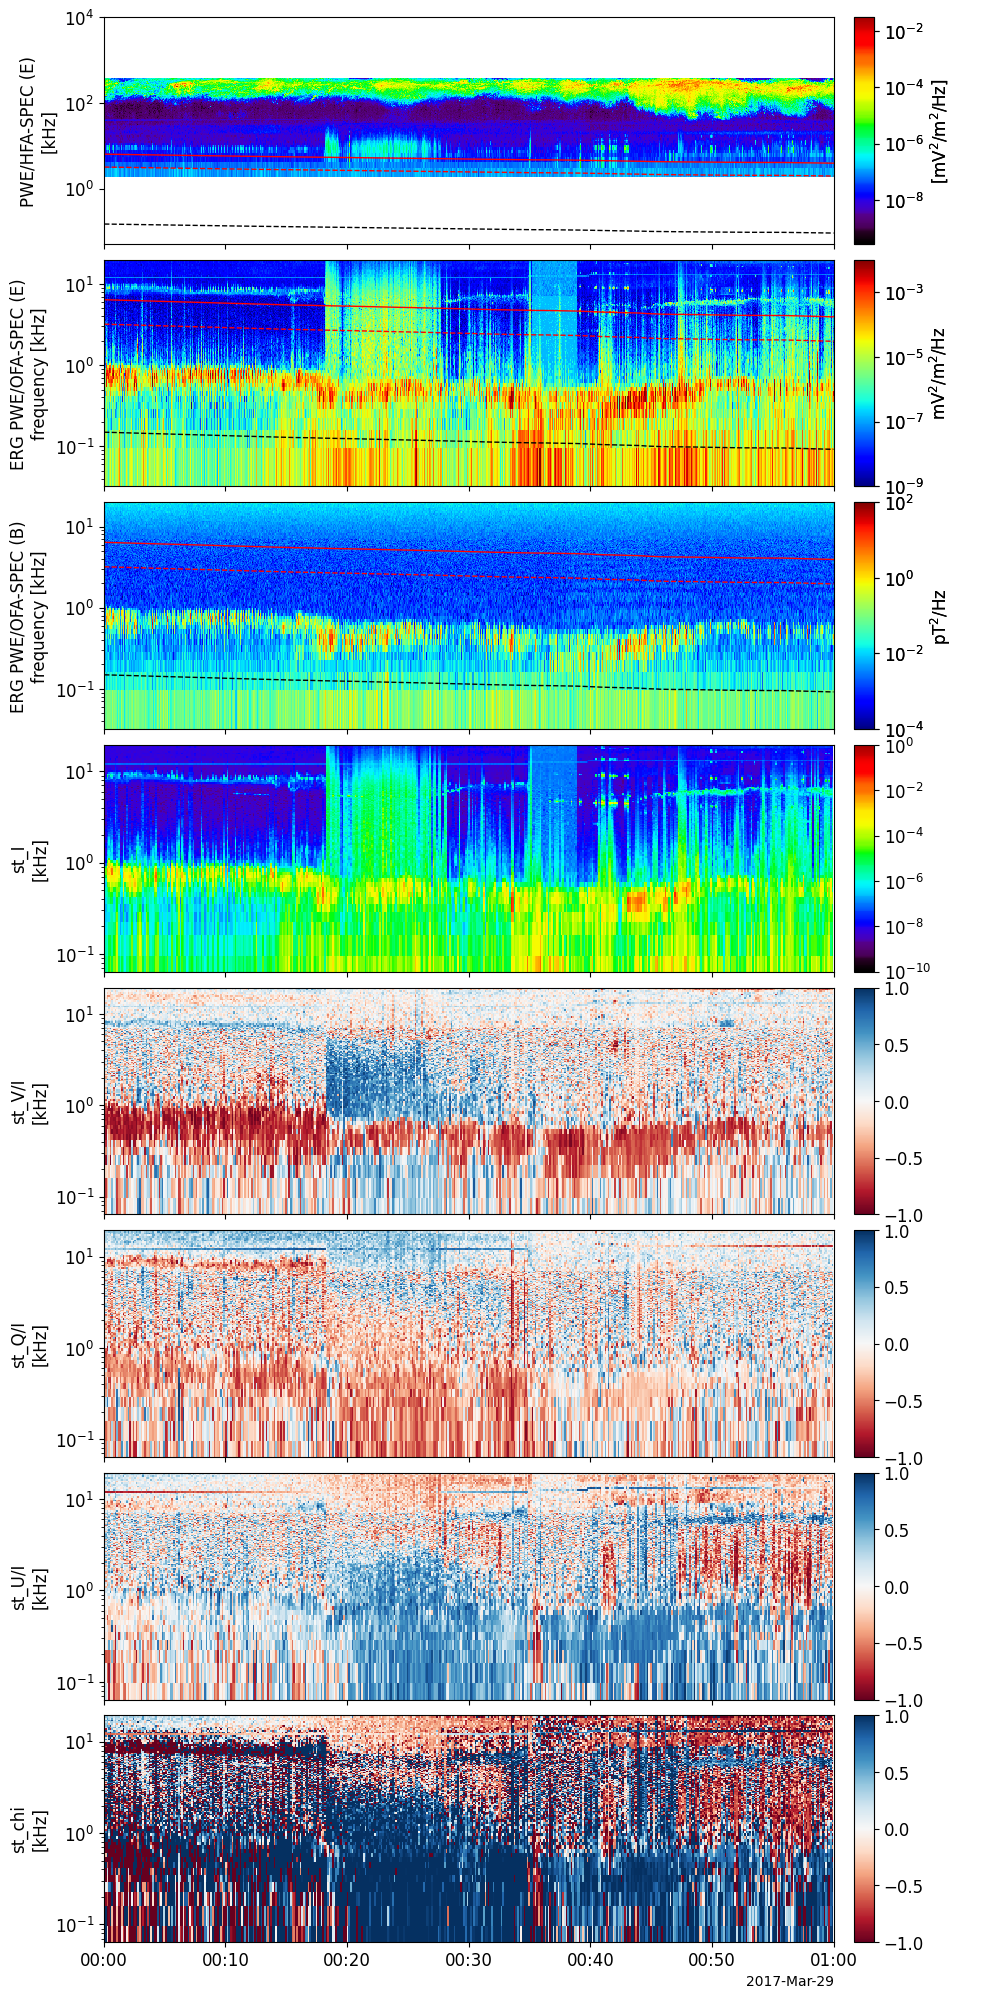

In [102]:
pytplot.tplot( ['erg_pwe_hfa_l2_spectra_e_mix','erg_pwe_ofa_l2_spec_E_spectra_merged', 'erg_pwe_ofa_l2_spec_B_spectra_merged', 'st_I_spec','st_V/I_spec', 'st_Q/I_spec','st_U/I_spec','st_chi_spec'], xsize=10, ysize=25)

In [ ]:
import ULF_duct_plot_ver2 as udp2

download_trange = ['2017-03-29', '2017-03-30']

'ne_mgf',\
        'kvec_polar_132',\
        'erg_pwe_ofa_l2_spec_B_spectra_132','erg_pwe_ofa_l2_spec_E_spectra_132',\
        'erg_mepe_l2_omniflux_FEDO',\
        'erg_mepe_l3_pa_FEDU_87.5keV', 'erg_mepe_l3_pa_FEDU_72.6keV', 'erg_mepe_l3_pa_FEDU_60.4keV','erg_mepe_l3_pa_FEDU_50.3keV', 'erg_mepe_l3_pa_FEDU_42.0keV','erg_mepe_l3_pa_FEDU_35.0keV','erg_mepe_l3_pa_FEDU_29.3keV','erg_mepe_l3_pa_FEDU_24.5keV','erg_mepe_l3_pa_FEDU_20.5keV','erg_mepe_l3_pa_FEDU_17.1keV','erg_mepe_l3_pa_FEDU_14.3keV','erg_mepe_l3_pa_FEDU_12.0keV',\
            'delta_z', 'erg_mgf_l2_magt_8sec','erg_mgf_l2_mag_8sec_MAF_x&y',\
            'erg_orb_l2_pos_rmlatmlt','erg_orb_l2_pos_eq' == udp2.ULF_duct_load(download_trange)

In [ ]:
pr_2 = ['2017-03-29 00:30:00','2017-03-29 01:00:00']
udp2.ULF_duct_plot_12to50('ne_mgf','kvec_polar_132','erg_pwe_ofa_l2_spec_B_spectra_132', 'erg_pwe_ofa_l2_spec_E_spectra_132', 'erg_mepe_l2_omniflux_FEDO', 'erg_mepe_l3_pa_FEDU_87.5keV', 'erg_mepe_l3_pa_FEDU_72.6keV', 'erg_mepe_l3_pa_FEDU_60.4keV','erg_mepe_l3_pa_FEDU_50.3keV', 'erg_mepe_l3_pa_FEDU_42.0keV','erg_mepe_l3_pa_FEDU_35.0keV','erg_mepe_l3_pa_FEDU_24.5keV','erg_mepe_l3_pa_FEDU_12.0keV', 'delta_z', 'erg_mgf_l2_magt_8sec', 'erg_mgf_l2_mag_8sec_MAF_x&y', 'erg_orb_l2_pos_rmlatmlt', pr_2)